In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [20, 10]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

# Effect of Altruism on segregation

Now, we can do a parameter sweep to see how segregation changes with altruism.

In [2]:
from mesa import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [3]:
fixed_params = {
    'width': 50,
    'height': 50,
    'density': 0.75,
    'minority_pc': 0.4,
    'homophily': 3,
    'follow_policy': 1.0
}

#policies = ["random", "distance", "relevance", "distance_relevance", "rich_neighborhood", "poor_neighborhood", "minimum_improvement", "maximum_improvement", "recently_emptied", "historically_emptied" ]

#policies = ["random", "distance_relevance", "rich_neighborhood", 
#            "minimum_improvement", "maximum_improvement", "recently_emptied", 
#            "similar_neighborhood", "different_neighborhood" ]
policies = ["random", "distance", "relevance", "distance_relevance", "rich_neighborhood", "poor_neighborhood",
            "minimum_improvement", "maximum_improvement", "recently_emptied", "historically_emptied", "empty_surrounded", 
            "similar_neighborhood", "different_neighborhood", "similar_history_cell", "similar_history_neighborhood"]

percentages = [i / 10 for i in range(0,11)]

variable_parms = {"policy": policies, "altruism": percentages}

merged_params = {**fixed_params, **variable_parms}
merged_params 

{'width': 50,
 'height': 50,
 'density': 0.75,
 'minority_pc': 0.4,
 'homophily': 3,
 'follow_policy': 1.0,
 'policy': ['random',
  'distance',
  'relevance',
  'distance_relevance',
  'rich_neighborhood',
  'poor_neighborhood',
  'minimum_improvement',
  'maximum_improvement',
  'recently_emptied',
  'historically_emptied',
  'empty_surrounded',
  'similar_neighborhood',
  'different_neighborhood',
  'similar_history_cell',
  'similar_history_neighborhood'],
 'altruism': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [ ]:
pd.options.mode.chained_assignment = None

results = batch_run(
    Schelling,
    parameters = merged_params,
    iterations=50,
    max_steps=100,
    number_processes = None
);

results_df = pd.DataFrame(results)


In [4]:
#results_df.to_csv("results_altruism.csv", index=False)
results_df = pd.read_csv("results_altruism.csv")
results_df[(results_df['policy'] == 'random') & (results_df['altruism'] == 0.4)].count()

RunId            50
iteration        50
Step             50
width            50
height           50
density          50
minority_pc      50
homophily        50
follow_policy    50
policy           50
altruism         50
perc_happy       50
segregation      50
dtype: int64

In [5]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation", "altruism"]]
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'altruism']).mean().reset_index()
results_df_g.head(50)

,policy,altruism,RunId,iteration,Step,follow_policy,segregation
0,different_neighborhood,0.0,4174.5,24.5,59.36,1.0,0.689125
1,different_neighborhood,0.1,4175.5,24.5,81.42,1.0,0.682489
2,different_neighborhood,0.2,4176.5,24.5,75.38,1.0,0.678575
3,different_neighborhood,0.3,4177.5,24.5,87.50,1.0,0.671257
4,different_neighborhood,0.4,4178.5,24.5,77.74,1.0,0.668110
5,different_neighborhood,0.5,4179.5,24.5,75.14,1.0,0.661223
6,different_neighborhood,0.6,4180.5,24.5,72.30,1.0,0.658400
7,different_neighborhood,0.7,4181.5,24.5,75.32,1.0,0.653973
8,different_neighborhood,0.8,4182.5,24.5,63.16,1.0,0.649364
9,different_neighborhood,0.9,4183.5,24.5,57.02,1.0,0.646008


In [6]:
#per each policy, extract the timeseries of Step and segregation
results_df_g_step = results_df_g.pivot(index='altruism', columns='policy', values='Step')
results_df_g_segregation = results_df_g.pivot(index='altruism', columns='policy', values='segregation')

Text(0, 0.5, 'nr. steps')

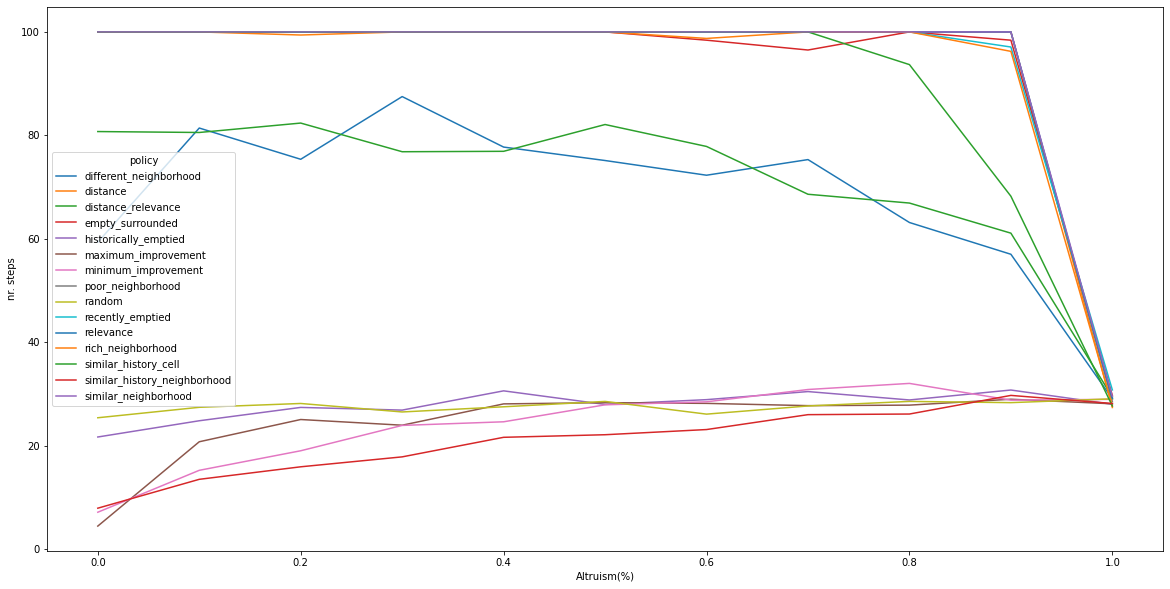

In [7]:
#plot the timeseries of Step
results_df_g_step.plot()
plt.xlabel("Altruism(%)")
plt.ylabel("nr. steps")

Text(0, 0.5, '<S>')

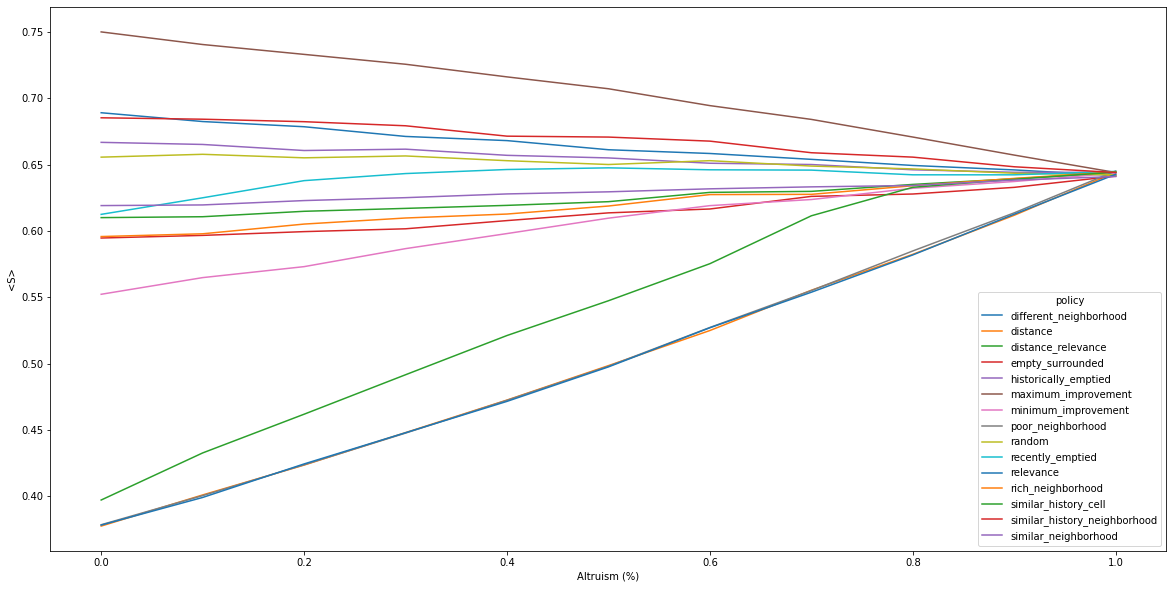

In [8]:
#plot the timeseries of S
results_df_g_segregation.plot()
plt.xlabel("Altruism (%)")
plt.ylabel("<S>")

In [9]:
results_df

,RunId,iteration,Step,follow_policy,policy,segregation,altruism
0,0,0,20,1.0,random,0.658828,0.0
1,1,0,22,1.0,random,0.656704,0.1
2,2,0,27,1.0,random,0.649946,0.2
3,3,0,35,1.0,random,0.660724,0.3
4,4,0,25,1.0,random,0.657147,0.4
...,...,...,...,...,...,...,...
8245,8228,49,100,1.0,similar_history_cell,0.416536,0.0
8246,8229,49,100,1.0,similar_history_cell,0.415401,0.1
8247,8247,49,26,1.0,similar_history_neighborhood,0.650453,0.8
8248,8248,49,22,1.0,similar_history_neighborhood,0.660927,0.9


In [10]:
#in results_df_g_std, calculate both the standard deviation and the mean of Step and segregation, across different iteration and policy

results_df_g_std = results_df.groupby(['policy', 'altruism']).agg({'Step': ['std', 'mean'], 'segregation': ['std', 'mean']}).reset_index()
results_df_g_std.columns = results_df_g_std.columns.droplevel(0)
results_df_g_std.columns = ['policy', 'altruism', 'Step_std', 'Step_mean', 'segregation_std', 'segregation_mean']
results_df_g_std.head(20)

,policy,altruism,Step_std,Step_mean,segregation_std,segregation_mean
0,different_neighborhood,0.0,36.991869,59.36,0.009210,0.689125
1,different_neighborhood,0.1,30.181147,81.42,0.009881,0.682489
2,different_neighborhood,0.2,32.029253,75.38,0.008501,0.678575
3,different_neighborhood,0.3,27.027008,87.50,0.009089,0.671257
4,different_neighborhood,0.4,31.850935,77.74,0.008279,0.668110
5,different_neighborhood,0.5,33.477382,75.14,0.008416,0.661223
6,different_neighborhood,0.6,34.744696,72.30,0.008172,0.658400
7,different_neighborhood,0.7,32.741062,75.32,0.009273,0.653973
8,different_neighborhood,0.8,35.257861,63.16,0.009294,0.649364
9,different_neighborhood,0.9,32.706793,57.02,0.008531,0.646008


In [11]:
results_df_g_mean_step = results_df_g_std.pivot(index='altruism', columns='policy', values='Step_mean')
results_df_g_std_step = results_df_g_std.pivot(index='altruism', columns='policy', values='Step_std')

results_df_g_std_segregation = results_df_g_std.pivot(index='altruism', columns='policy', values='segregation_std')
results_df_g_mean_segregation = results_df_g_std.pivot(index='altruism', columns='policy', values='segregation_mean')



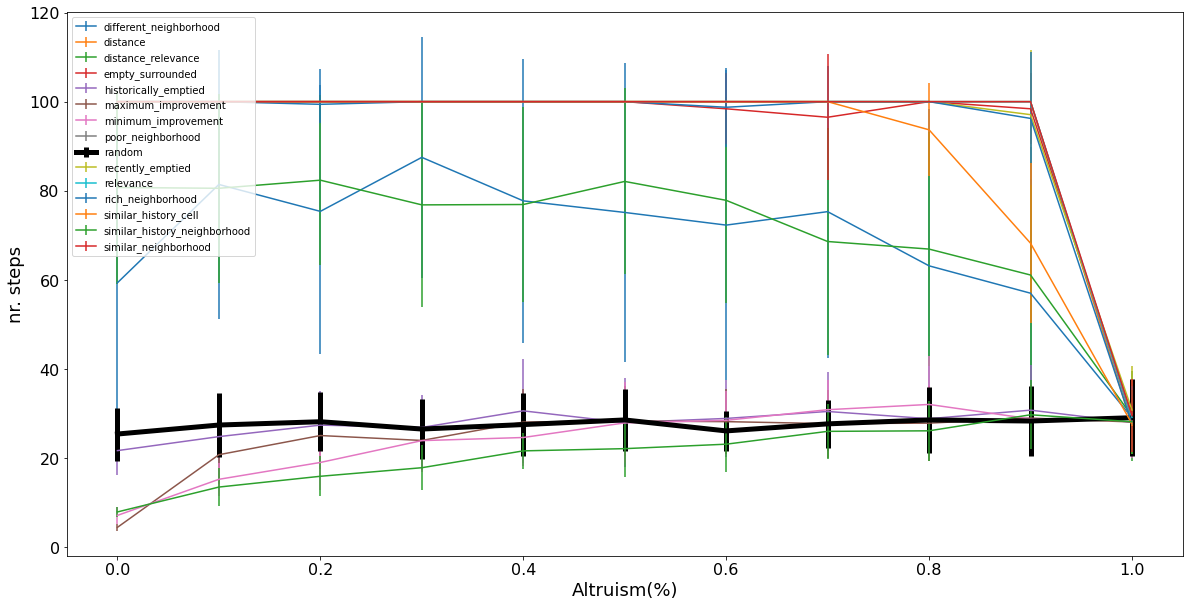

In [12]:
#join all the columns of the dataframe, so that we have the standard deviation and the mean of Step and segregation, per each policy, with different colors
for column in results_df_g_std_step.columns:
    if column == "random": #the baseline must be thicker and a normal line without error bars
        #plt.plot(results_df_g_mean_step.index, results_df_g_mean_step[column], label=column, linewidth=5, color = "black")
        plt.errorbar(results_df_g_mean_step.index, results_df_g_mean_step[column], yerr=results_df_g_std_step[column], label=column, linewidth=5, color = "black")
    else:
        plt.errorbar(results_df_g_mean_step.index, results_df_g_mean_step[column], yerr=results_df_g_std_step[column], label=column)

plt.xlabel("Altruism(%)", fontsize=18)
plt.ylabel("nr. steps", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left')
plt.show()
    

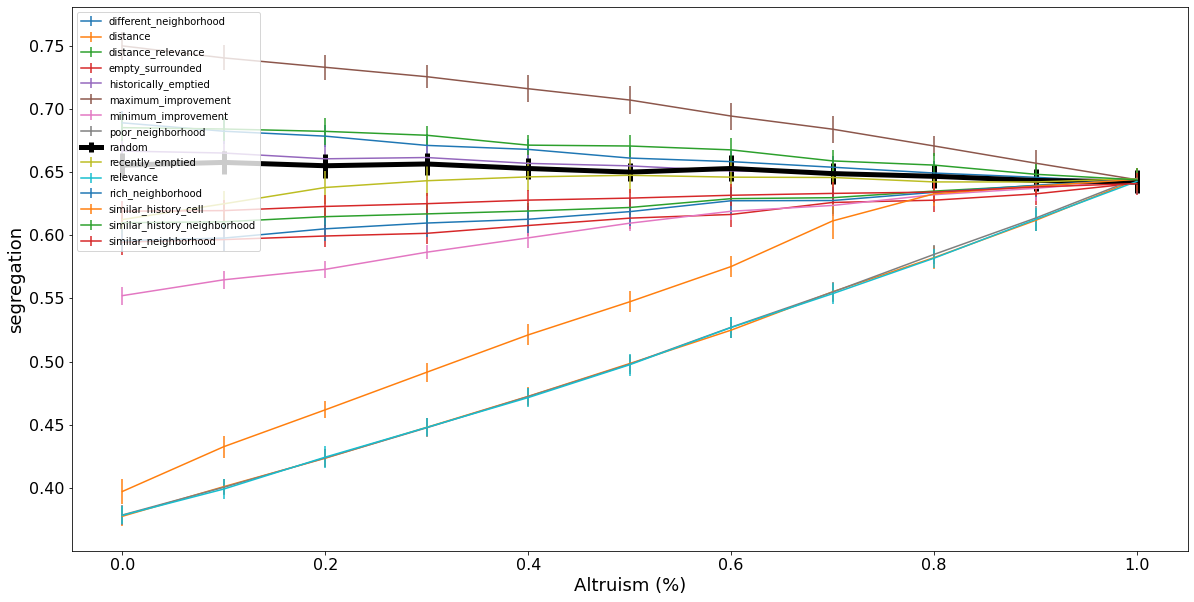

In [13]:
for column in results_df_g_std_segregation.columns:
    if column == "random": #the baseline must be thicker and a normal line without error bars
        plt.errorbar(results_df_g_mean_segregation.index, results_df_g_mean_segregation[column], yerr=results_df_g_std_segregation[column], label=column, linewidth=5, color = "black")
    else:
        plt.errorbar(results_df_g_mean_segregation.index, results_df_g_mean_segregation[column], yerr=results_df_g_std_segregation[column], label=column)

plt.xlabel("Altruism (%)", fontsize=18)
plt.ylabel("segregation", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left')
plt.show()
